In [245]:
import pandas as pd
import matplotlib.pyplot as plt


# import data

In [139]:
columns = ['name','sex','births']
path0 = 'datasets/babynames/yob'
path2 = '.txt'
years = range(1880,2011) 
pieces = []

for x in years:
    path = path0+str(x)+path2
    frame1 = pd.read_csv(path,names=columns)
    frame1['year'] = x
    pieces.append(frame1)

names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


# births-year plot

In [142]:
total_births = names.groupby(['year','sex']).births.sum().unstack()

In [143]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

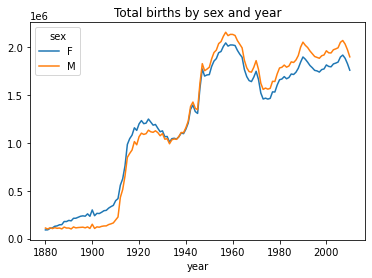

In [145]:
total_births.plot(title='Total births by sex and year')

# insert prop_column and check

In [163]:
def add_prop(group):    
    group['prop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [164]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

# extract top_1000 in each group

In [178]:
def get_top1000(group):
    group.sort_values(by='prop',ascending=False)
    return group[:1000]
top1000 = names.groupby(['year','sex']).apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


# analyze by gender

In [182]:
boys= top1000[top1000.sex=='M']
girls= top1000[top1000.sex=='F']

In [186]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6862 entries, Aaden to Zuri
dtypes: float64(6862)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

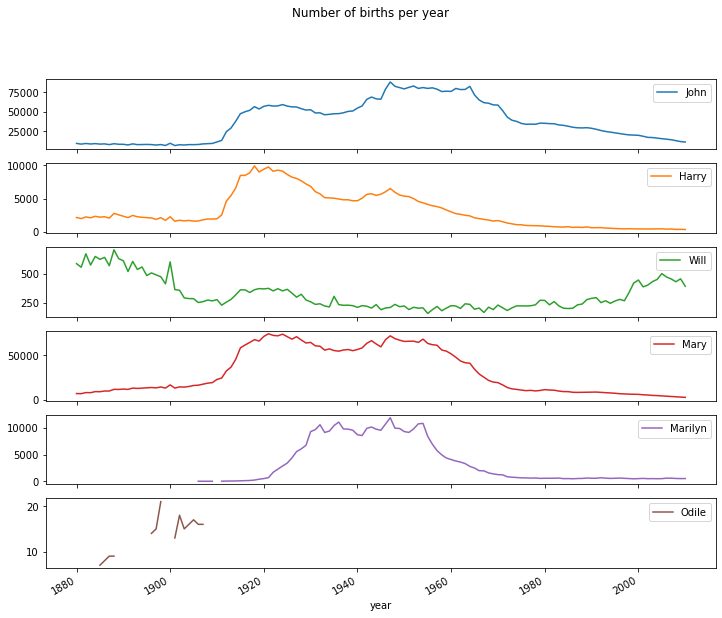

In [190]:
subset = total_births[['John','Harry','Will','Mary','Marilyn','Odile']]
subset.plot(subplots=True, figsize=(12,10),grid=False,title='Number of births per year')

# diversity of name

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

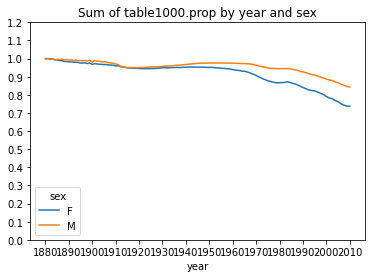

In [198]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [208]:
df = boys[boys.year==2010]
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)+1

117

In [210]:
df = boys[boys.year==1900]
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)+1

25

In [216]:
def get_quantile_count(group,q=0.5):
    prop_cumsum = group.sort_values(by='prop',ascending=False).prop.cumsum()
    return prop_cumsum.searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count).unstack()

<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

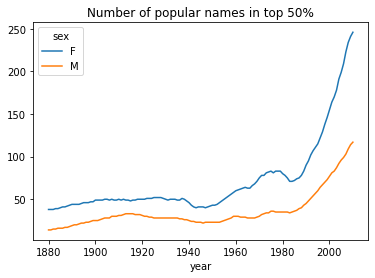

In [217]:
diversity.plot(title='Number of popular names in top 50%')

# last letter revolution

In [228]:
last_letter = names['name'].str[-1]
last_letter.name = 'last_letter'

In [231]:
table = names.pivot_table('births',index=last_letter,columns=['sex','year'],aggfunc=sum)

In [246]:
selected_columns = [('F', 1910), ('F', 1960), ('F', 2010), ('M', 1910), ('M', 1960), ('M', 2010)]
subtable = table.loc[:, selected_columns]
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
...               ...       ...       ...      ...       ...       ...
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

[26 rows x 6 columns]

In [247]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [249]:
letter_prop = table/table.sum()
letter_prop 

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343440  0.338764  0.341251  0.338550  0.341270   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006478   
e            0.366819  0.370616  0.374582  0.373159  0.372722  0.372896   
...               ...       ...       ...       ...       ...       ...   
v                 NaN       NaN       NaN       NaN       NaN       NaN   
w                 NaN  0.000054       NaN       NaN       NaN       NaN   
x                 NaN       NaN       NaN  0.000062       NaN       NaN   
y            0.115053  0.113142  0.112609  0.107397  0.107866  0.104670   
z            0.001165  0.001033  0.000983  0.001255  0.001147  0.001127   

sex                                                  ...         M            \
year             1886      1887      1888      1889  ...      2001      2002   
last_letter                                          ...                       
a            0.339703  0.335258  0.332764  0.328706  ...  0.020162  0.020019   
b                 NaN       NaN       NaN       NaN  ...  0.026256  0.025418   
c                 NaN       NaN       NaN       NaN  ...  0.013972  0.014048   
d            0.006967  0.007035  0.007266  0.007703  ...  0.031352  0.028794   
e            0.372802  0.372324  0.373675  0.373736  ...  0.074927  0.074603   
...               ...       ...       ...       ...  ...       ...       ...   
v                 NaN       NaN       NaN       NaN  ...  0.000623  0.000687   
w            0.000035       NaN       NaN       NaN  ...  0.026934  0.025840   
x                 NaN       NaN       NaN       NaN  ...  0.005509  0.005678   
y            0.103336  0.102615  0.100380  0.098677  ...  0.071687  0.069397   
z            0.001398  0.001288  0.001332  0.001553  ...  0.001464  0.001412   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a            0.019177  0.019505  0.018481  0.017635  0.016747  0.016189   
b            0.024368  0.023171  0.021645  0.020778  0.020357  0.019655   
c            0.014042  0.013514  0.013083  0.012991  0.012983  0.012458   
d            0.027069  0.026118  0.025420  0.025075  0.024451  0.023574   
e            0.073396  0.071710  0.070799  0.069748  0.069445  0.069362   
...               ...       ...       ...       ...       ...       ...   
v            0.000838  0.000920  0.000900  0.000980  0.001109  0.001190   
w            0.024882  0.023999  0.022809  0.021079  0.019452  0.018175   
x            0.005941  0.006257  0.006534  0.006825  0.006914  0.007299   
y            0.066197  0.064781  0.062806  0.060338  0.059634  0.060342   
z            0.001380  0.001368  0.001456  0.001505  0.001595  0.001709   

sex                              
year             2009      2010  
last_letter                      
a            0.015927  0.014980  
b            0.019693  0.020470  
c            0.012186  0.012181  
d            0.023398  0.023387  
e            0.068663  0.067959  
...               ...       ...  
v            0.001312  0.001434  
w            0.016814  0.016148  
x            0.008432  0.008614  
y            0.057223  0.058168  
z            0.001841  0.001831  

[26 rows x 262 columns]

In [252]:
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
dny_ts

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405
...,...,...,...
2006,0.025075,0.351666,0.060338
2007,0.024451,0.358274,0.059634
2008,0.023574,0.361101,0.060342


<AxesSubplot:xlabel='year'>

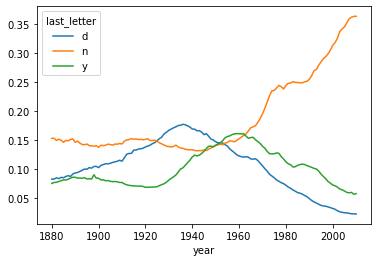

In [253]:
dny_ts.plot()

# boys' name turning to girls'

In [254]:
all_names = pd.Series(top1000.name.unique())

In [264]:
lesley_like = all_names[all_names.str.lower().str.startswith('lesl')]

In [266]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered

,name,sex,births,year,prop
654,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2465,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4535,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


In [276]:
table = filtered.pivot_table('births', index='year', columns='sex',aggfunc=sum)
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [275]:
table1 = table.div(table.sum(1),axis=0)
table1

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


<AxesSubplot:xlabel='year'>

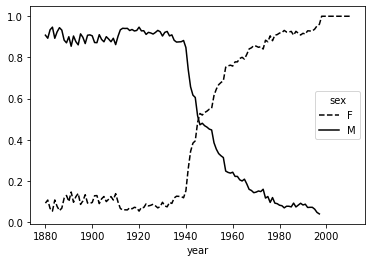

In [278]:
table1.plot(style={'M': 'k-', 'F': 'k--'})